### **2. Exploratory Data Analysis**

To produce a model that can make accurate predictions on data that has never been seen before, ensure that there is no information leakage from the test set.

Therefore, data exploration is only performed on the training dataset.

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pylab
import sys

#add the project source directory to the system path for importing custom utilities
sys.path.append("../src")

#import custom utility function from 'utils' module
import utils

In [2]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': '../data/raw/Loan_default.csv',
 'dataset_path': '../data/output/data.pkl',
 'predictors_set_path': '../data/output/predictors.pkl',
 'response_set_path': '../data/output/response.pkl',
 'train_path': ['../data/output/X_train.pkl', '../data/output/y_train.pkl'],
 'test_path': ['../data/output/X_test.pkl', '../data/output/y_test.pkl'],
 'data_train_path': '../data/output/training_data.pkl',
 'data_train_binned_path': '../data/output/bin_training_data.pkl',
 'crosstab_list_path': '../data/output/list_crosstab.pkl',
 'WOE_table_path': '../data/output/WOE_table.pkl',
 'IV_table_path': '../data/output/IV_table.pkl',
 'WOE_map_dict_path': '../data/output/WOE_map_dict.pkl',
 'X_train_woe_path': '../data/output/X_train_woe.pkl',
 'response_variable': 'Default',
 'test_size': 0.2,
 'numeric_col': ['Age',
  'Income',
  'LoanAmount',
  'MonthsEmployed',
  'NumCreditLines',
  'InterestRate',
  'LoanTerm',
  'DTIRatio'],
 'categoric_col': ['Education',
  'EmploymentType',
  'Ma

In [3]:
def concat_data(type):
    """
    Concat the input (X) and output (y) data and save the result
    
    Parameters
    ----------
    data_type : str
        A string indicating the type of data (train or test) 
    """
    #load input (X) and output (y) data
    X = utils.pickle_load(config_data[f'{type}_path'][0])
    y = utils.pickle_load(config_data[f'{type}_path'][1])
    
    #concatenate X and y
    data = pd.concat((X, y),
                     axis = 1)

    #display and validate data
    print(f'Data shape:', data.shape)

    #dump concatenated data
    utils.pickle_dump(data, config_data[f'data_{type}_path'])
   
    return data

In [4]:
#check the function for train data
training_data = concat_data(type='train')
training_data.head()

Data shape: (204277, 16)


,Age,Income,LoanAmount,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
15826,45,37039,247916,19,2,4.62,60,0.85,High School,Unemployed,Married,No,Yes,Auto,No,0
147371,48,133963,66275,119,3,14.72,48,0.49,PhD,Self-employed,Married,Yes,Yes,Other,Yes,0
178180,47,100204,6967,108,3,5.51,24,0.76,High School,Self-employed,Single,Yes,Yes,Business,Yes,0
126915,42,36078,25966,2,3,18.29,36,0.76,Bachelor's,Self-employed,Married,No,Yes,Education,No,0
163930,20,99464,248557,74,3,19.45,60,0.45,Bachelor's,Part-time,Divorced,No,No,Auto,Yes,1


on EDA, *check data integrity*, *check for any insight in the data: distribution, proportion, outliers, missing values, etc*. and *make a plan for data pre-processing*.

In [5]:
#check missing values
training_data.isnull().sum()

Age               0
Income            0
LoanAmount        0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
#display information about training_data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204277 entries, 15826 to 7493
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             204277 non-null  int64  
 1   Income          204277 non-null  int64  
 2   LoanAmount      204277 non-null  int64  
 3   MonthsEmployed  204277 non-null  int64  
 4   NumCreditLines  204277 non-null  int64  
 5   InterestRate    204277 non-null  float64
 6   LoanTerm        204277 non-null  int64  
 7   DTIRatio        204277 non-null  float64
 8   Education       204277 non-null  object 
 9   EmploymentType  204277 non-null  object 
 10  MaritalStatus   204277 non-null  object 
 11  HasMortgage     204277 non-null  object 
 12  HasDependents   204277 non-null  object 
 13  LoanPurpose     204277 non-null  object 
 14  HasCoSigner     204277 non-null  object 
 15  Default         204277 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 26.5+

In [7]:
#calculate the number of unique values in each column
training_data.nunique()

Age                   52
Income            105266
LoanAmount        138834
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

From the data above, there is no missing value data.

#### ***Predictor 1 : Age***

In [8]:
#generate descriptive statistic for Age column
training_data['Age'].describe()

count    204277.000000
mean         43.508716
std          14.989978
min          18.000000
25%          31.000000
50%          44.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

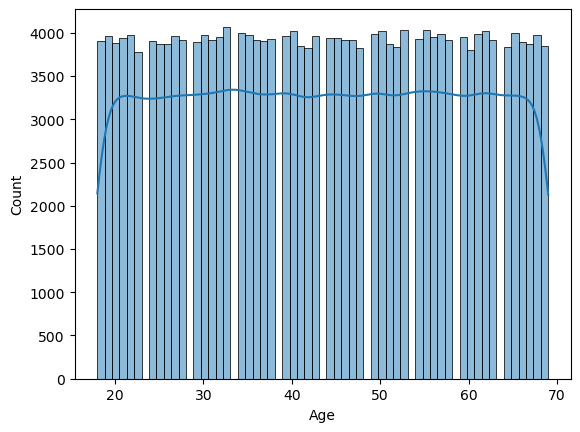

In [9]:
#create histogram and kernel density estimate (KDE) plot for Age column
sns.histplot(data = training_data, x = 'Age', kde = True)

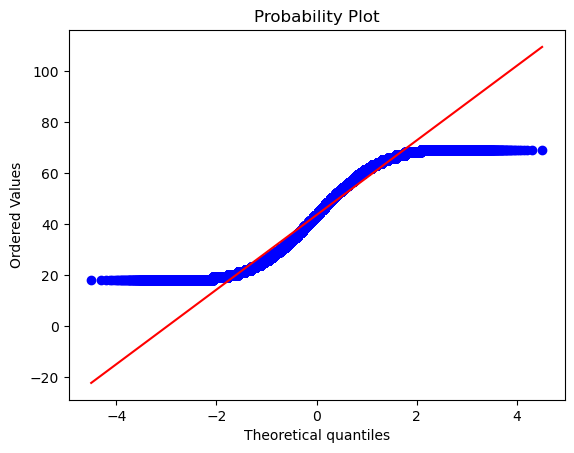

In [10]:
#create probability plot for the Age column
stats.probplot(training_data["Age"], dist = "norm", plot = pylab)
plt.show()

Age data is unevenly distributed and does not follow a normal distribution. There are more young people than old people. This suggests that there is a young population structure.

In [11]:
#group the Age column in training data by Default column and compute descriptive statistics
training_data['Age'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,44.412284,14.889980,18.0,32.0,45.0,57.0,69.0
1,23722.0,36.631397,13.926156,18.0,25.0,34.0,47.0,69.0


<AxesSubplot:xlabel='Default', ylabel='Age'>

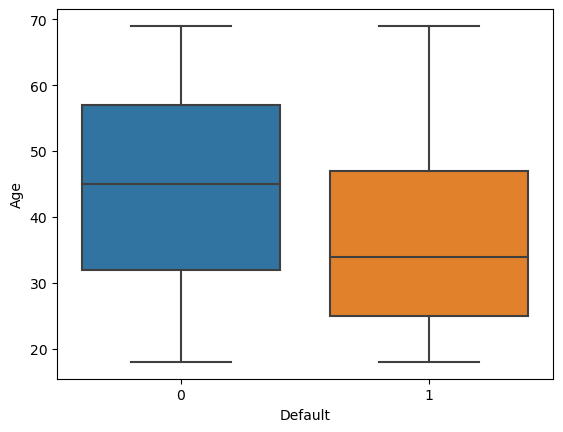

In [12]:
#create a box plot to visualize the distribution of Age by Default groups
sns.boxplot(data=training_data, x="Default", y="Age")

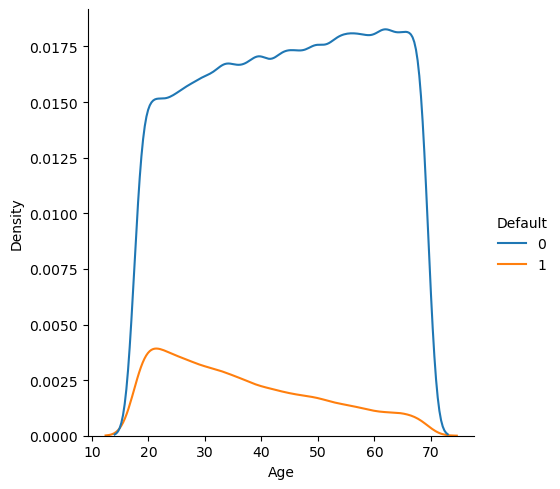

In [13]:
#create kernel density plot
sns.displot(data=training_data, x="Age", hue="Default", kind = 'kde')

Check the maximum threshold for outliers from the IQR method below.

In [14]:
#calculate Q1 and Q3
Q1_person_age = np.percentile(training_data['Age'], 25)
Q3_person_age = np.percentile(training_data['Age'], 75)

#calculate IQR
IQR_person_age = Q3_person_age - Q1_person_age

#calculate the thresholds
min_person_age = Q1_person_age - 1.5*IQR_person_age
max_person_age = Q3_person_age + 1.5*IQR_person_age

min_person_age, max_person_age

(-6.5, 93.5)

From the IQR, debtors younger than -6.5 years and older than 93.5 years are outliers.

Assumptions:
- The age regulation for the applicant is a minimum of 20 years old.
- Applicants older than 55 to 65 may still be in productive age.

Therefore, we can define outliers from `age` variable with the following condition.

In [15]:
#define minimum and maximum age with adjustment
adj_min_person_age = 20
adj_max_person_age = 60

#define outliers
outliers_person_age_min = training_data['Age'] < 20
outliers_person_age_max = training_data['Age'] > 60

outliers_person_age = np.where(outliers_person_age_min | outliers_person_age_max)[0]

#check the number of outliers in data_train
len(outliers_person_age)

43207

**Summary**

- The youngest debtor is 18 years old.
- Three-quarters of the debtors are up to 48 years old. The rest are over 56 years old.
- The oldest debtor is 69 years old.
- There are differences in age between the two groups. The age of borrowers in Default 0 has a higher mean and greater variation compared to Default 1.

**Business Insight:**
- Check the maximum age limit for the applicant and adjust it to the tenor.
- Check the regulations to see if it will accept applicants aged 19 years. If not, are debtors aged 19 still included in the sample?

**Pre-processing Plan:**
- There are no missing values.
- The outliers will be grouped.

#### ***Predictor 2 : Income***

In [16]:
#generate descriptive statistic for Income column
training_data['Income'].describe()

count    204277.000000
mean      82530.595393
std       38971.511128
min       15000.000000
25%       48842.000000
50%       82519.000000
75%      116223.000000
max      149999.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Count'>

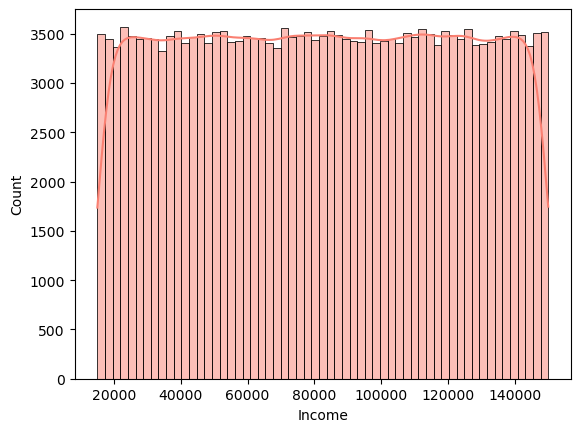

In [17]:
#create histogram and kernel density estimate (KDE) plot for Income column
sns.histplot(data = training_data, x = 'Income', kde = True, color='salmon')

In [18]:
#group the Income column in training data by Default column and compute descriptive statistics
training_data['Income'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,83925.657949,38501.250697,15000.0,50979.0,84270.0,117189.5,149999.0
1,23722.0,71912.370964,40848.317457,15004.0,33964.0,66624.5,107100.0,149995.0


<AxesSubplot:xlabel='Default', ylabel='Income'>

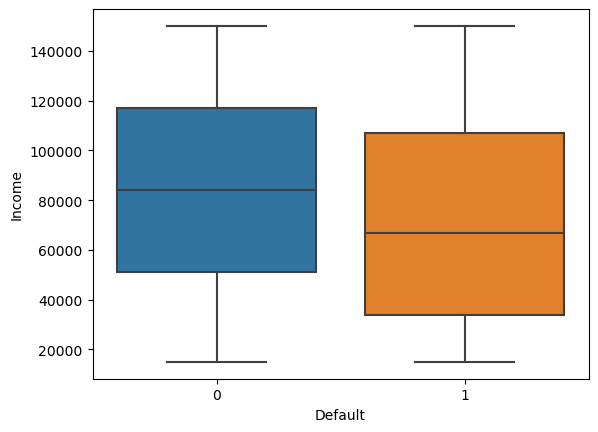

In [19]:
#create a box plot to visualize the distribution of Income by Default groups
sns.boxplot(data=training_data, x="Default", y="Income")

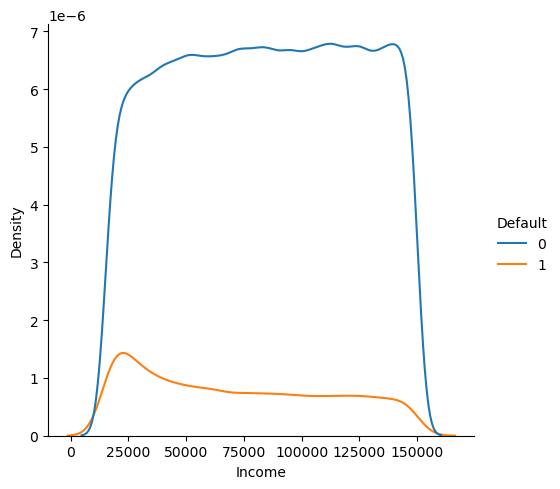

In [20]:
#create kernel density plot
sns.displot(data=training_data, x="Income", hue="Default", kind = 'kde')

In [21]:
#count number of rows
len(training_data[training_data["Income"] < 0 ])

0

**Summary**

- A borrower who defaults has a slightly lower average income than a borrower who does not default.

#### ***Predictor 3 : LoanAmount***

In [22]:
#generate descriptive statistic for Loan Amount column
training_data['LoanAmount'].describe()

count    204277.000000
mean     127523.946225
std       70876.250817
min        5000.000000
25%       65983.000000
50%      127400.000000
75%      189046.000000
max      249999.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

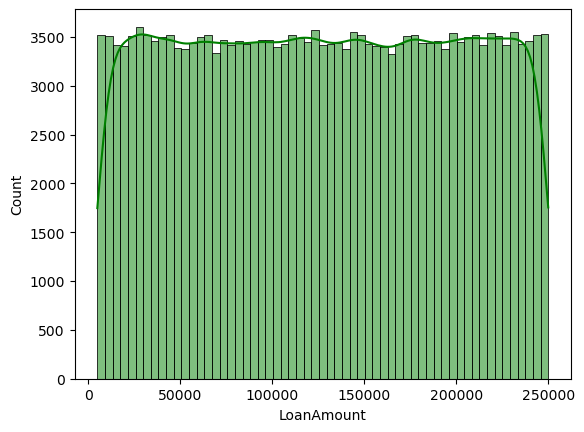

In [23]:
#create histogram and kernel density estimate (KDE) plot for Loan Amount column
sns.histplot(data = training_data, x = 'LoanAmount', kde = True, color='green')

In [24]:
#group the Loan Amount column in training data by Default column and compute descriptive statistics
training_data['LoanAmount'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,125305.018975,70740.669887,5001.0,63751.0,124119.0,186158.5,249999.0
1,23722.0,144412.843015,69620.954796,5000.0,87699.0,152410.0,205697.0,249993.0


<AxesSubplot:xlabel='Default', ylabel='LoanAmount'>

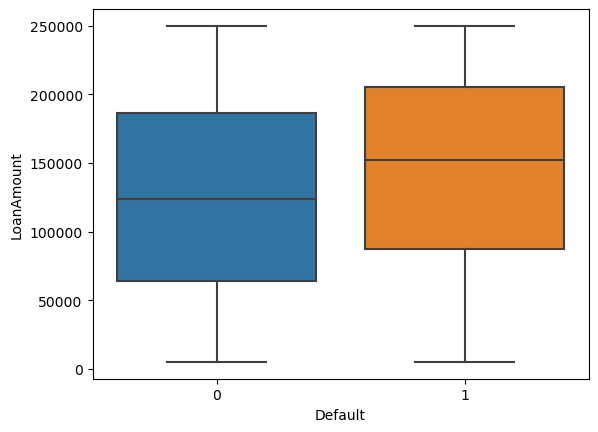

In [25]:
#create a box plot to visualize the distribution of Loan Amount by Default groups
sns.boxplot(data=training_data, x="Default", y="LoanAmount")

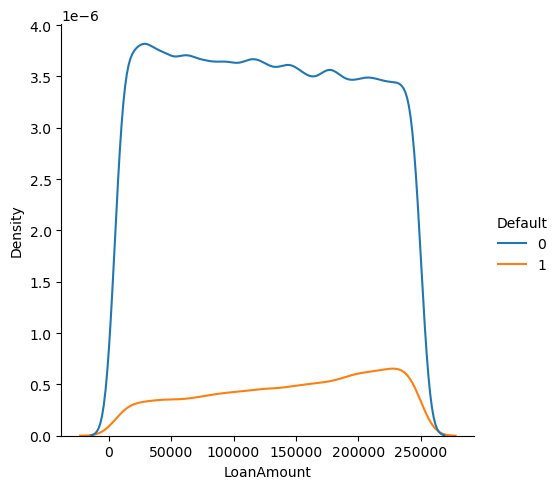

In [26]:
#create kernel density plot
sns.displot(data=training_data, x="LoanAmount", hue="Default", kind = 'kde')

**Summary**

- Borrowers who default have a higher average loan amount than borrowers who do not default.

#### ***Predictor 4 : MonthsEmployed***

In [27]:
#generate descriptive statistic for Months Employed column
training_data['MonthsEmployed'].describe()

count    204277.000000
mean         59.578420
std          34.664996
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

<AxesSubplot:xlabel='MonthsEmployed', ylabel='Count'>

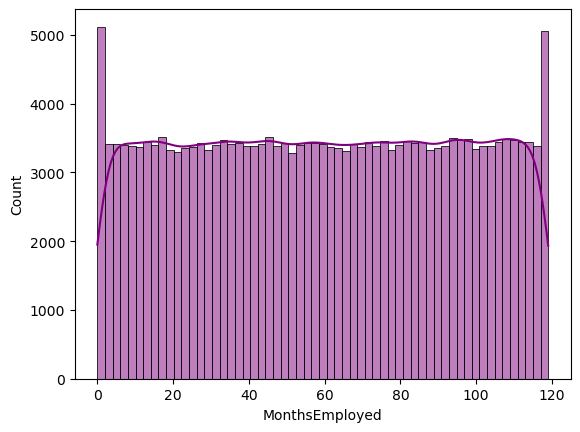

In [28]:
#create histogram and kernel density estimate (KDE) plot for Months Employed column
sns.histplot(data = training_data, x = 'MonthsEmployed', kde = True, color='purple')

In [29]:
#group the Months Employed column in training data by Default column and compute descriptive statistics
training_data['MonthsEmployed'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,60.789488,34.587843,0.0,31.0,61.0,91.0,119.0
1,23722.0,50.360636,33.856263,0.0,21.0,46.0,78.0,119.0


<AxesSubplot:xlabel='Default', ylabel='MonthsEmployed'>

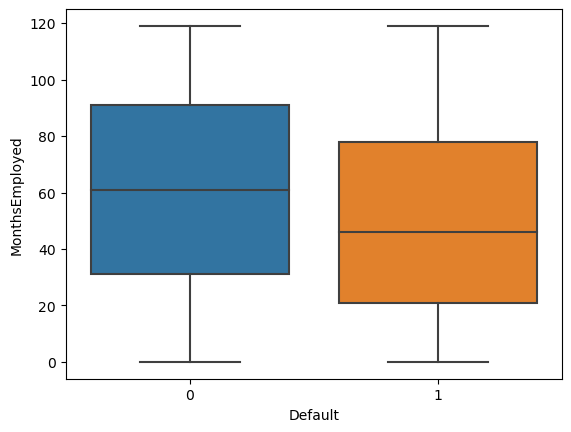

In [30]:
#create a box plot to visualize the distribution of Months Employed by Default groups
sns.boxplot(data=training_data, x="Default", y="MonthsEmployed")

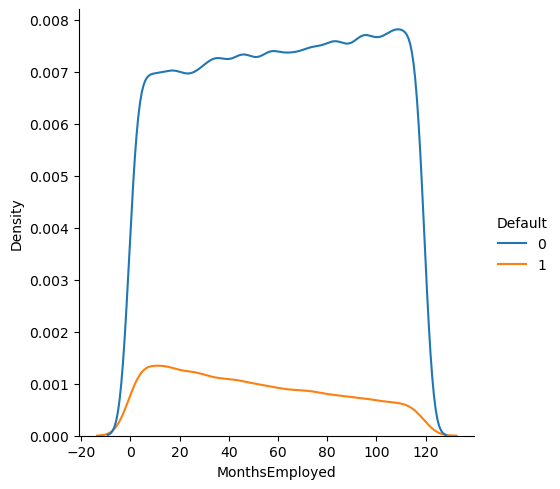

In [31]:
#create kernel density plot
sns.displot(data=training_data, x="MonthsEmployed", hue="Default", kind = 'kde')

In [32]:
#create MonthEmployed column in years
MonthsEmployed_New = training_data['MonthsEmployed'] / 12

In [33]:
#display
MonthsEmployed_New

15826     1.583333
147371    9.916667
178180    9.000000
126915    0.166667
163930    6.166667
            ...   
59108     4.166667
71610     6.833333
85645     3.500000
21010     1.250000
7493      1.833333
Name: MonthsEmployed, Length: 204277, dtype: float64

In [34]:
#check and show if there is any data that does not make sense
data_inconsistencies = training_data[MonthsEmployed_New > training_data['Age']]
print(len(data_inconsistencies))

0


**Summary**

- The number of MonthEmployed for both defaulted and non-defaulted borrowers has a minimum value of 0 months and a maximum of 119 months.
- There are no data inconsistencies such as MonthEmployed data exceeding the age of the borrower.
- In the non-defaulted group (Default 0), the average number of months employed (MonthsEmployed) is longer than in the defaulted group (Default 1).

#### ***Predictor 5 : NumCreditLines***

In [35]:
#generate descriptive statistic for Number Credit Lines column
training_data['NumCreditLines'].describe()

count    204277.000000
mean          2.501892
std           1.116968
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: NumCreditLines, dtype: float64

<AxesSubplot:xlabel='NumCreditLines', ylabel='Count'>

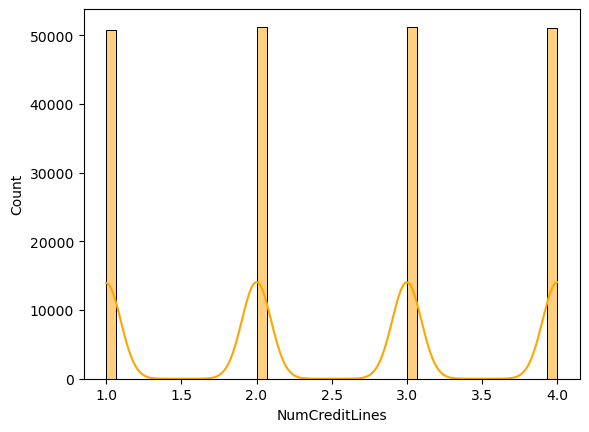

In [36]:
#create histogram and kernel density estimate (KDE) plot for Number Credit Lines column
sns.histplot(data = training_data, x = 'NumCreditLines', kde = True, color='orange')

In [37]:
#group the Number Credit Lines column in training data by Default column and compute descriptive statistics
training_data['NumCreditLines'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,2.490488,1.116542,1.0,1.0,2.0,3.0,4.0
1,23722.0,2.588694,1.116423,1.0,2.0,3.0,4.0,4.0


<AxesSubplot:xlabel='Default', ylabel='NumCreditLines'>

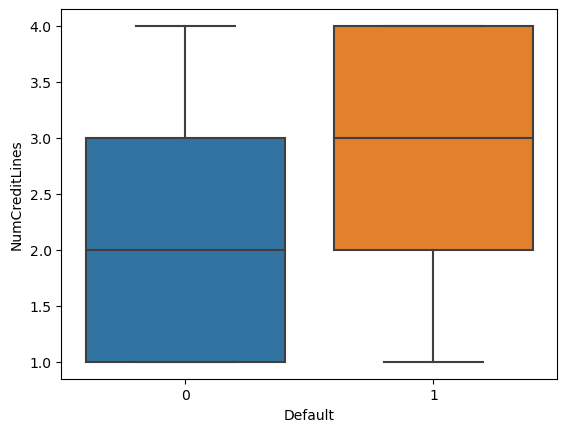

In [38]:
#create a box plot to visualize the distribution of Number Credit Lines by Default groups
sns.boxplot(data=training_data, x="Default", y="NumCreditLines")

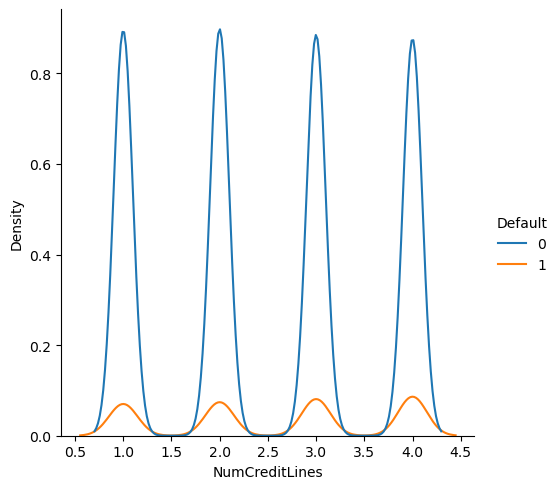

In [39]:
#create kernel density plot
sns.displot(data=training_data, x="NumCreditLines", hue="Default", kind = 'kde')

**Summary**

- The average number of credit lines (NumCreditLines) is almost the same for both groups. The non-defaulted group (Default 0) has an average of about 2.49 credit lines, while the defaulted group (Default 1) has an average of about 2.59 credit lines.
- Most individuals in both groups have 1, 2, 3, or 4 lines of credit.
- There is no significant difference in the average number of credit lines between the two groups.

#### ***Predictor 6 : InterestRate***

In [40]:
#generate descriptive statistic for Interest Rate column
training_data['InterestRate'].describe()

count    204277.000000
mean         13.488165
std           6.638219
min           2.000000
25%           7.760000
50%          13.450000
75%          19.240000
max          25.000000
Name: InterestRate, dtype: float64

C:\Users\UYUN\AppData\Local\Temp\ipykernel_11288\1512692743.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = training_data, x = 'InterestRate', kde = True, palette='pastel')


<AxesSubplot:xlabel='InterestRate', ylabel='Count'>

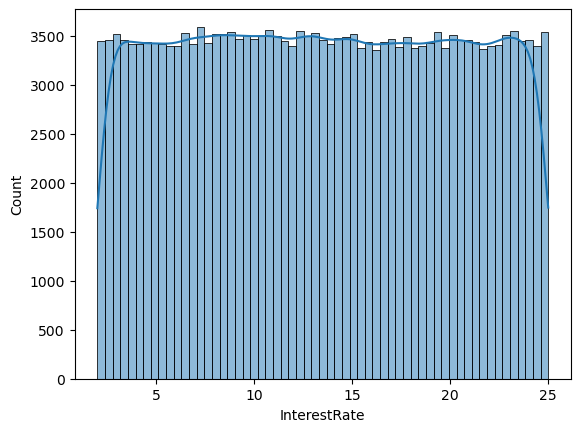

In [41]:
#create histogram and kernel density estimate (KDE) plot for Interest Rate column
sns.histplot(data = training_data, x = 'InterestRate', kde = True, palette='pastel')

In [42]:
#group the Interest Rate column in training data by Default column and compute descriptive statistics
training_data['InterestRate'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,13.172089,6.614562,2.0,7.44,12.99,18.84,25.0
1,23722.0,15.893906,6.317117,2.0,11.06,16.89,21.37,25.0


<AxesSubplot:xlabel='Default', ylabel='InterestRate'>

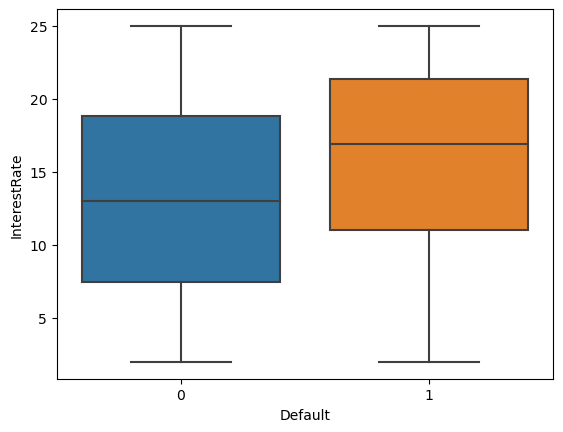

In [43]:
#create a box plot to visualize the distribution of Interest Rate by Default groups
sns.boxplot(data=training_data, x="Default", y="InterestRate")

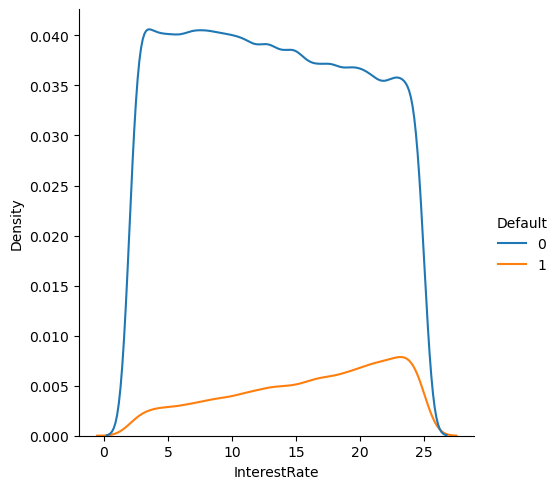

In [44]:
#create kernel density plot
sns.displot(data=training_data, x="InterestRate", hue="Default", kind = 'kde')

**Summary**

- There is a significant difference in interest rates between the two groups. Higher interest rates may be an indication of higher credit risk.
- The average InterestRate is higher in the defaulted group (Default 1) compared to the non-defaulted group (Default 0).
- Most individuals in both groups have interest rates between 11 and 21.37, but the Default 1 group tends to have higher interest rates.

#### ***Predictor 7 : LoanTerm***

In [45]:
#generate descriptive statistic for Loan Term column
training_data['LoanTerm'].describe()

count    204277.000000
mean         35.991188
std          16.973883
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: LoanTerm, dtype: float64

<AxesSubplot:xlabel='LoanTerm', ylabel='Count'>

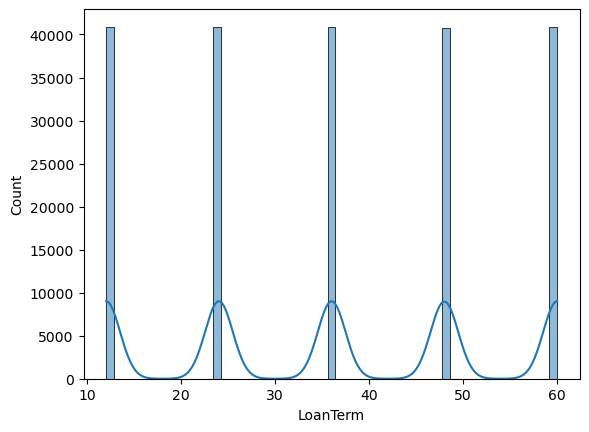

In [46]:
#create histogram and kernel density estimate (KDE) plot for Loan Term column
sns.histplot(data = training_data, x = 'LoanTerm', kde = True)

In [47]:
#group the Loan Term column in training data by Default column and compute descriptive statistics
training_data['LoanTerm'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,35.983916,16.969709,12.0,24.0,36.0,48.0,60.0
1,23722.0,36.046539,17.005876,12.0,24.0,36.0,48.0,60.0


<AxesSubplot:xlabel='Default', ylabel='LoanTerm'>

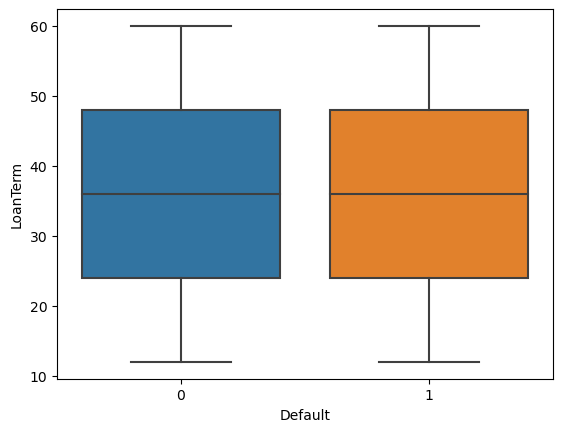

In [48]:
#create a box plot to visualize the distribution of Loan Term by Default groups
sns.boxplot(data=training_data, x="Default", y="LoanTerm")

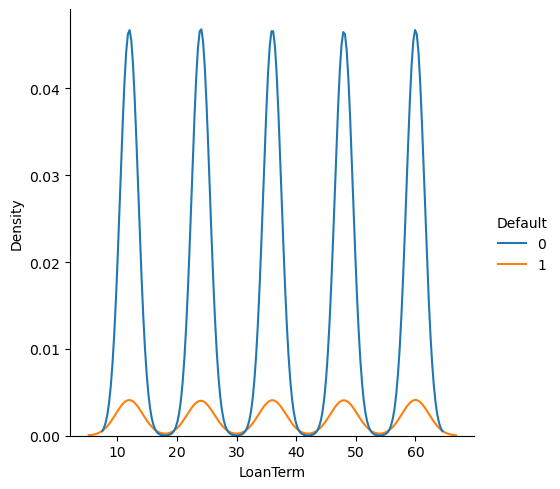

In [49]:
#create kernel density plot
sns.displot(data=training_data, x="LoanTerm", hue="Default", kind = 'kde')

**Summary**

- The average loan tenure (LoanTerm) is almost the same between the two groups, both those who have defaulted (Default 1) and those who have not (Default 0).
- Most individuals in both groups have a loan tenure between 24 to 48 months.
- Loan tenure ranges from 12 to 60 months.
- There is no significant difference in loan tenure between the defaulted and non-defaulted groups.

#### ***Predictor 8 : DTIRatio***

In [50]:
#generate descriptive statistic for DTI Ratio column
training_data['DTIRatio'].describe()

count    204277.000000
mean          0.500504
std           0.231005
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

C:\Users\UYUN\AppData\Local\Temp\ipykernel_11288\2007093673.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = training_data, x = 'DTIRatio', kde = True, palette='colorblind')


<AxesSubplot:xlabel='DTIRatio', ylabel='Count'>

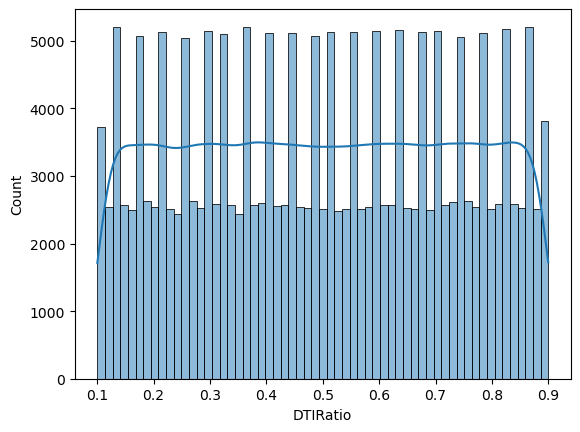

In [51]:
#create histogram and kernel density estimate (KDE) plot for DTI Ratio column
sns.histplot(data = training_data, x = 'DTIRatio', kde = True, palette='colorblind') 

In [52]:
#group the DTI Ratio column in training data by Default column and compute descriptive statistics
training_data['DTIRatio'].groupby(training_data["Default"]).describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,180555.0,0.498762,0.231175,0.1,0.30,0.50,0.70,0.9
1,23722.0,0.513769,0.229270,0.1,0.32,0.52,0.71,0.9


<AxesSubplot:xlabel='Default', ylabel='DTIRatio'>

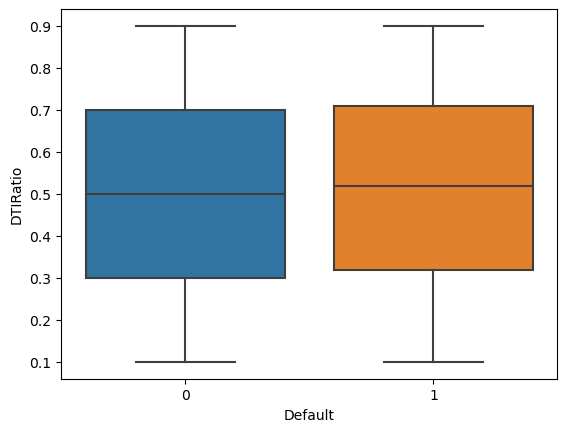

In [53]:
#create a box plot to visualize the distribution of DTI Ratio by Default groups
sns.boxplot(data=training_data, x="Default", y="DTIRatio")

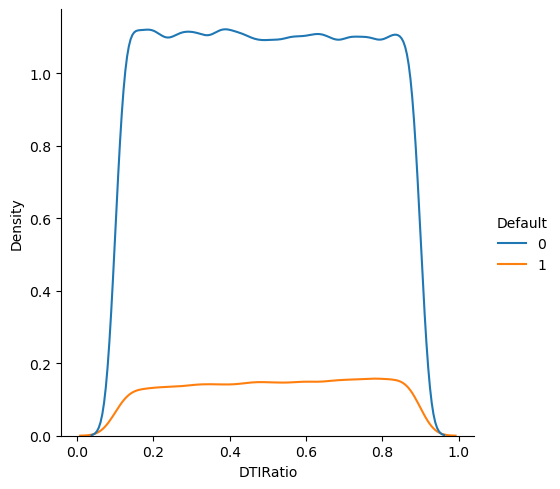

In [54]:
#create kernel density plot
sns.displot(data=training_data, x="DTIRatio", hue="Default", kind = 'kde')

**Summary**

- The DTIRatio ranges from 0.1 to 0.9.
- The average debt-to-income ratio (DTIRatio) in the two groups, both those in default (Default 1) and those without (Default 0), are relatively close to each other. Although the average DTIRatio is slightly higher in the Default 1 group.

#### ***Predictor 9 : Education***

In [55]:
#generate descriptive statistic for Education column
training_data['Education'].value_counts(normalize = True)

Bachelor's     0.252290
High School    0.250258
PhD            0.249284
Master's       0.248168
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

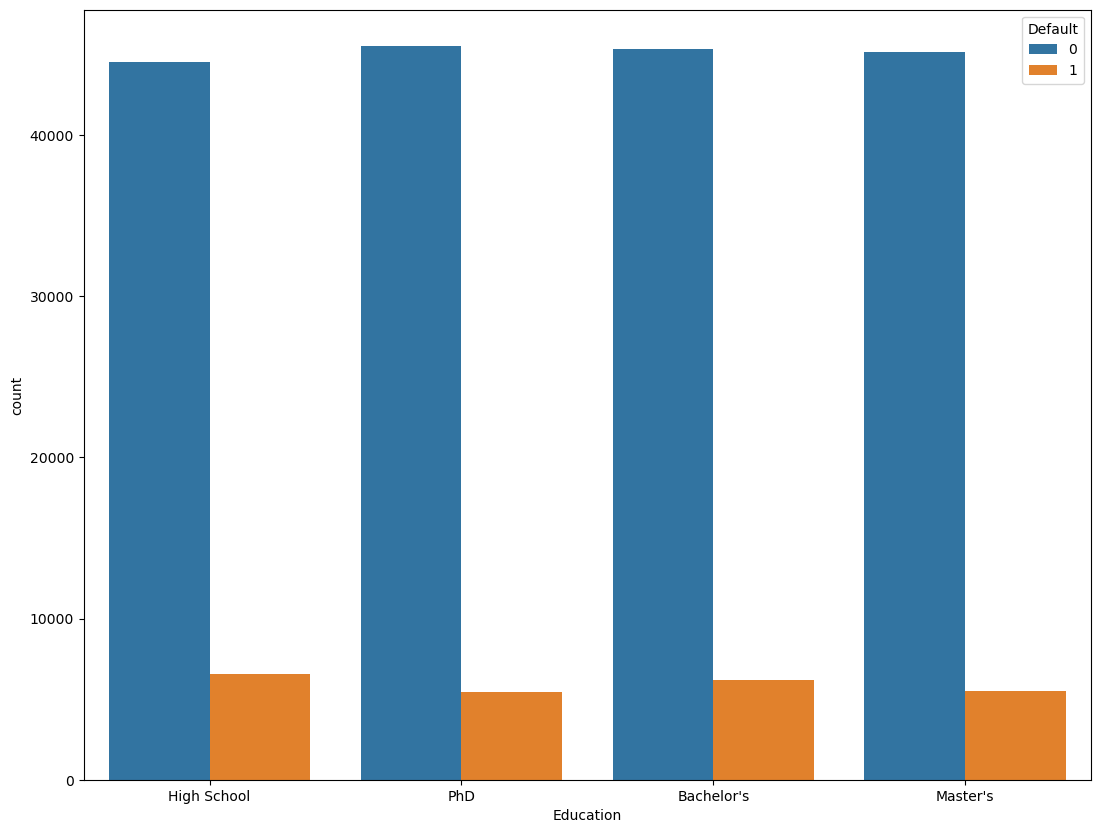

In [56]:
#create a countplot to visualize the distribution of education levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="Education", hue="Default")

In [57]:
def calculate_odds(data, predictor_label, response_variable):
  """
  Calculate and return the oddof the response variable (default) by predictor_label
  
  Args
  ----
  data : DataFrame
    Input data containing predictor and response variables
  predictor_label : Str
    The column label of the predictor variable
  response_variable : Str
    The column label of the binary response variable

  Returns
  -------
  DataFrame : A DataFrame showing the odds of default for each category of the predictor_label

  The function calculates the odds of default for each category of the predictor variable and returns
  a DataFrame sorted by the odds value in descending order.
  """
  #frequency of default by predictor_label
  crosstab = pd.crosstab(data[predictor_label],
                         data[response_variable],
                         margins = False)

  #calculate odds
  crosstab['Odds'] = np.round((crosstab[1]/crosstab[0]),2)

  #sort by the odds value
  crosstab = crosstab.sort_values(by = 'Odds',
                       ascending = False)

  return crosstab

In [58]:
#calculate and display the odds of default by education level
odds_education = calculate_odds(data = training_data, predictor_label = "Education", response_variable="Default")
odds_education

Default,0,1,Odds
Education,,,
High School,44552,6570,0.15
Bachelor's,45320,6217,0.14
Master's,45174,5521,0.12
PhD,45509,5414,0.12


**Summary**

- Lending to individuals with higher education levels tends to have a lower default risk.
- The default ratio (Default 1) tends to be lower for individuals with higher education levels.

#### ***Predictor 10 : EmploymentType***

In [59]:
#generate descriptive statistic for Employment Type column
training_data['EmploymentType'].value_counts(normalize = True)

Part-time        0.251247
Self-employed    0.249778
Unemployed       0.249646
Full-time        0.249328
Name: EmploymentType, dtype: float64

<AxesSubplot:xlabel='EmploymentType', ylabel='count'>

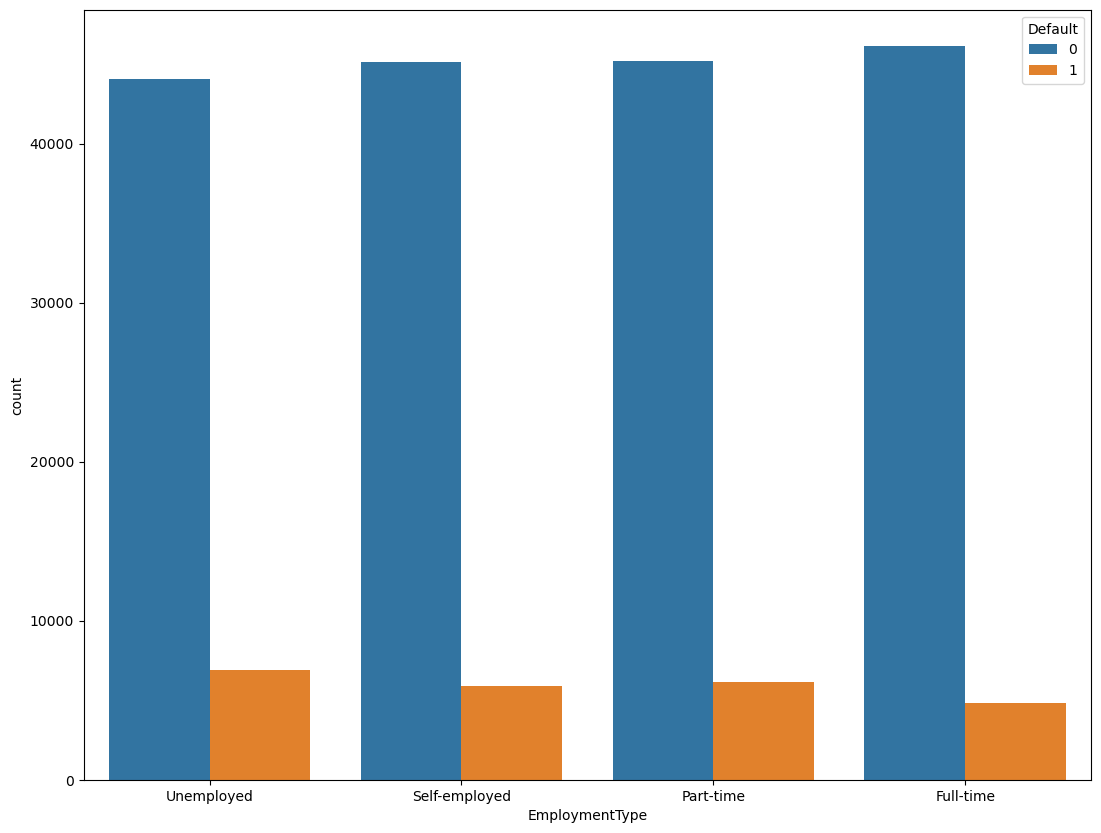

In [60]:
#create a countplot to visualize the distribution of Employment Type levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="EmploymentType", hue="Default")

In [61]:
#calculate and display the odds of default by Employment Type level
odds_employmenttype = calculate_odds(data = training_data, predictor_label = "EmploymentType", response_variable="Default")
odds_employmenttype

Default,0,1,Odds
EmploymentType,,,
Unemployed,44088,6909,0.16
Part-time,45210,6114,0.14
Self-employed,45143,5881,0.13
Full-time,46114,4818,0.10


**Summary**

- Unemployed individuals have the highest default odds, which is around 0.16. This indicates that people who are unemployed have a higher risk of default. This may be due to the lack of a stable source of income.
- Individuals who work part-time also have fairly high default odds, which are around 0.14. Although lower than those who are not employed, they still have a significant default risk.
- Meanwhile, self-employed and full-time individuals have lower default odds of around 0.13 and 0.10, respectively. This suggests that having a full-time job or self-employment status can reduce the risk of default.

#### ***Predictor 11 : MaritalStatus***

In [62]:
#generate descriptive statistic for Marital Status column
training_data['MaritalStatus'].value_counts(normalize = True)

Married     0.334159
Divorced    0.333038
Single      0.332803
Name: MaritalStatus, dtype: float64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

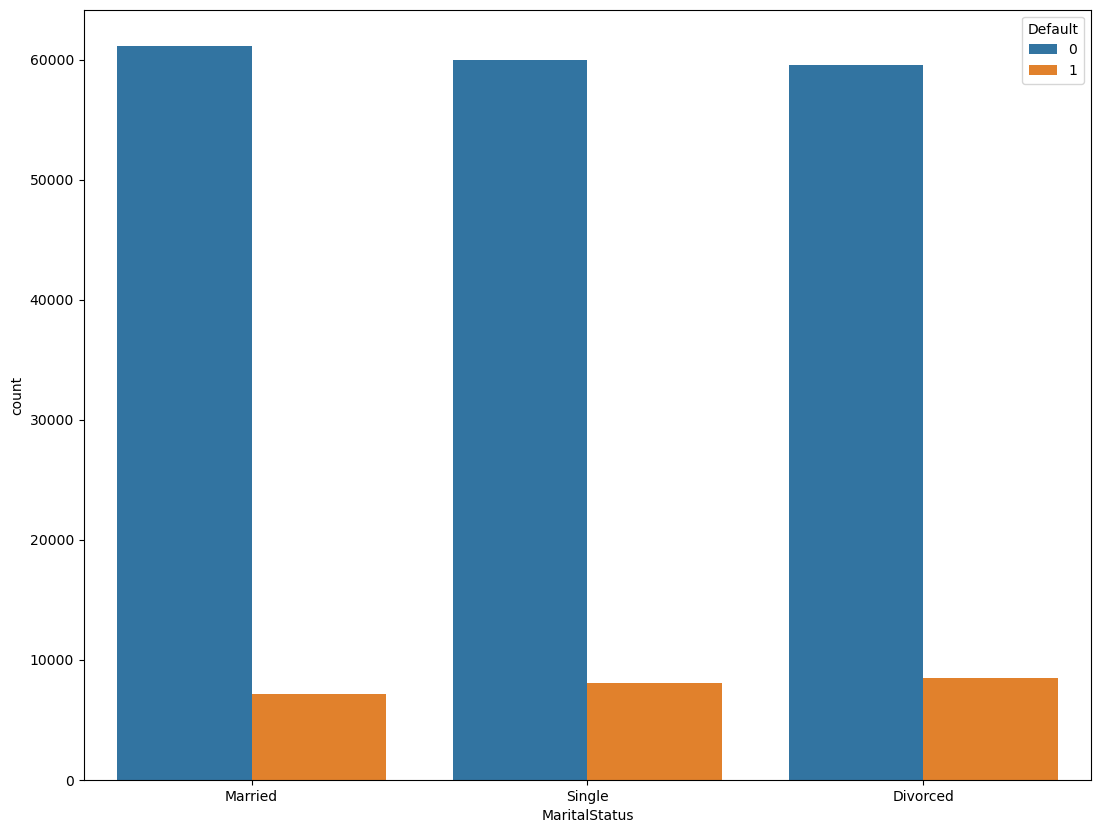

In [63]:
#create a countplot to visualize the distribution of Marital Status levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="MaritalStatus", hue="Default")

In [64]:
#calculate and display the odds of default by Marital Status level
odds_maritalstatus = calculate_odds(data = training_data, predictor_label = "", response_variable="Default")
odds_maritalstatus

Default,0,1,Odds
MaritalStatus,,,
Divorced,59536,8496,0.14
Single,59925,8059,0.13
Married,61094,7167,0.12


**Summary**

- Divorced individuals have the highest default odds. This suggests that divorced marital status may increase the risk of default.
- Unmarried individuals (Single) have slightly lower default odds. Although lower than the divorced ones, the marital status "Single" also still has a significant default risk.
- Meanwhile, individuals who are married (Married) have lower default odds of around 0.12. This suggests that "Married" marital status may be associated with a lower default risk.

#### ***Predictor 12 : HasMortgage***

In [65]:
#generate descriptive statistic for Has Mortgage column
training_data['HasMortgage'].value_counts(normalize = True)

Yes    0.500218
No     0.499782
Name: HasMortgage, dtype: float64

<AxesSubplot:xlabel='HasMortgage', ylabel='count'>

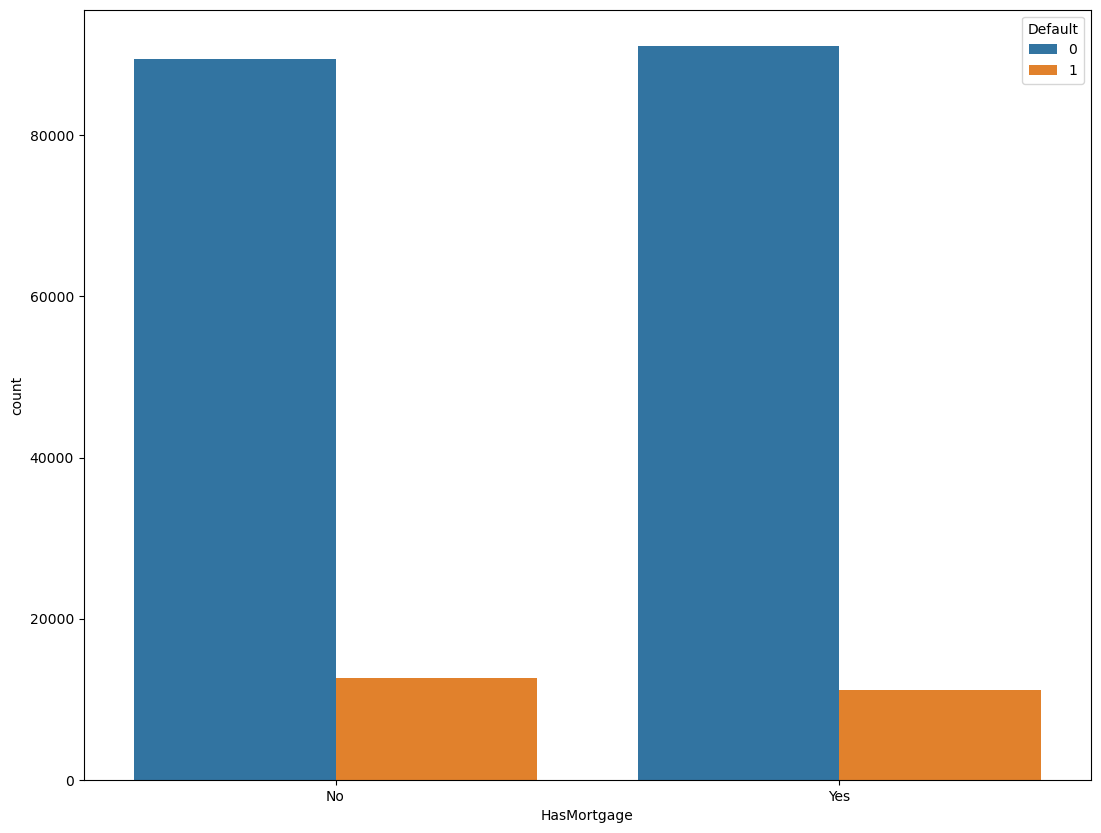

In [66]:
#create a countplot to visualize the distribution of Has Mortgage levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="HasMortgage", hue="Default")

In [67]:
#calculate and display the odds of default by Has Mortgage level
odds_hasmortgage = calculate_odds(data = training_data, predictor_label = "HasMortgage", response_variable="Default")
odds_hasmortgage

Default,0,1,Odds
HasMortgage,,,
No,89507,12587,0.14
Yes,91048,11135,0.12


**Summary**

- Individuals who do not have a mortgage (No) have higher default odds of about 0.14. This suggests that not having a mortgage may increase the risk of default.

#### ***Predictor 13 : HasDependents***

In [68]:
#generate descriptive statistic for Has Dependents column
training_data['HasDependents'].value_counts(normalize = True)

Yes    0.500673
No     0.499327
Name: HasDependents, dtype: float64

<AxesSubplot:xlabel='HasDependents', ylabel='count'>

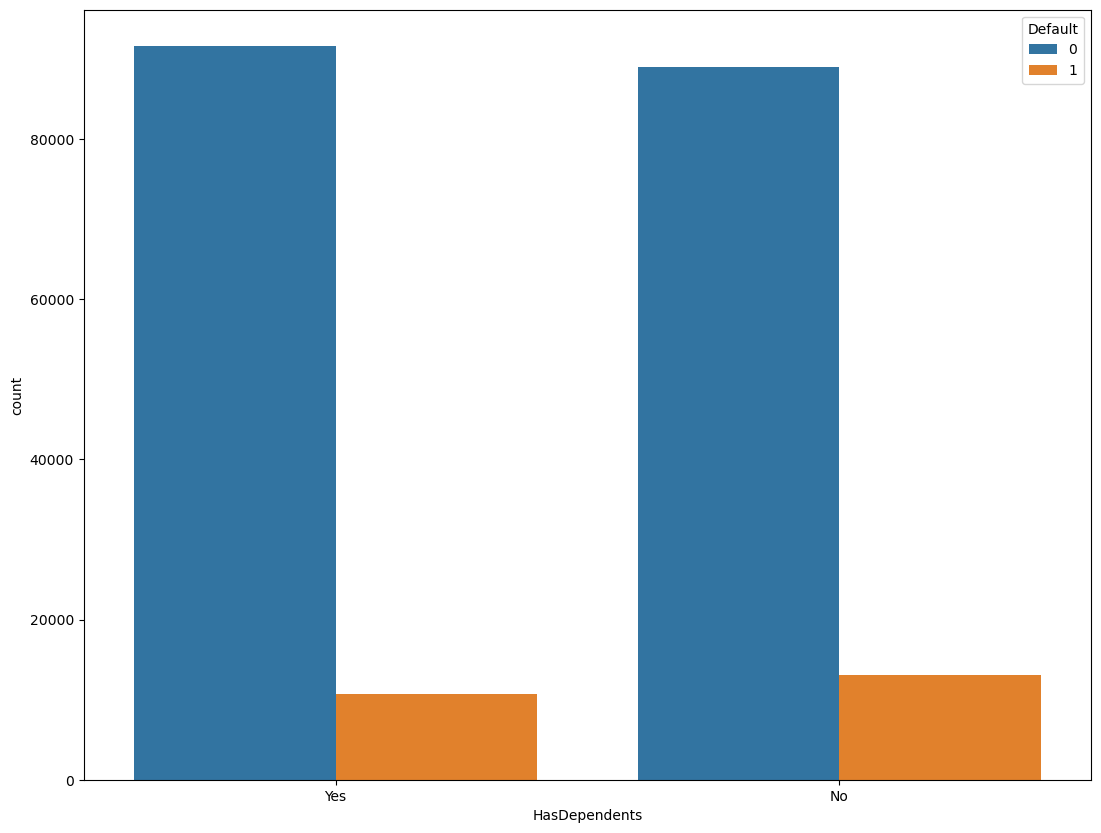

In [69]:
#create a countplot to visualize the distribution of Has Dependents levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="HasDependents", hue="Default")

In [70]:
#calculate and display the odds of default by Has Dependents level
odds_hasdependents = calculate_odds(data = training_data, predictor_label = "HasDependents", response_variable="Default")
odds_hasdependents

Default,0,1,Odds
HasDependents,,,
No,88985,13016,0.15
Yes,91570,10706,0.12


**Summary**

- Borrowers without dependents (HasDependents: No) have a default rate of about 13%. This means that about 13% of borrowers without dependents defaulted in this dataset.
- Borrowers with dependents (HasDependents: Yes) have a similar default rate of around 12%. This means that about 12% of borrowers with dependents defaulted.
- Odds (the ratio of borrowers who default to those who do not) for these two groups are also relatively close to each other, with values of around 0.15 for borrowers without dependents and around 0.12 for borrowers with dependents.

#### ***Predictor 14 : LoanPurpose***

In [71]:
#generate descriptive statistic for Loan Purpose column
training_data['LoanPurpose'].value_counts(normalize = True)

Business     0.200747
Home         0.200688
Education    0.199841
Other        0.199474
Auto         0.199249
Name: LoanPurpose, dtype: float64

<AxesSubplot:xlabel='LoanPurpose', ylabel='count'>

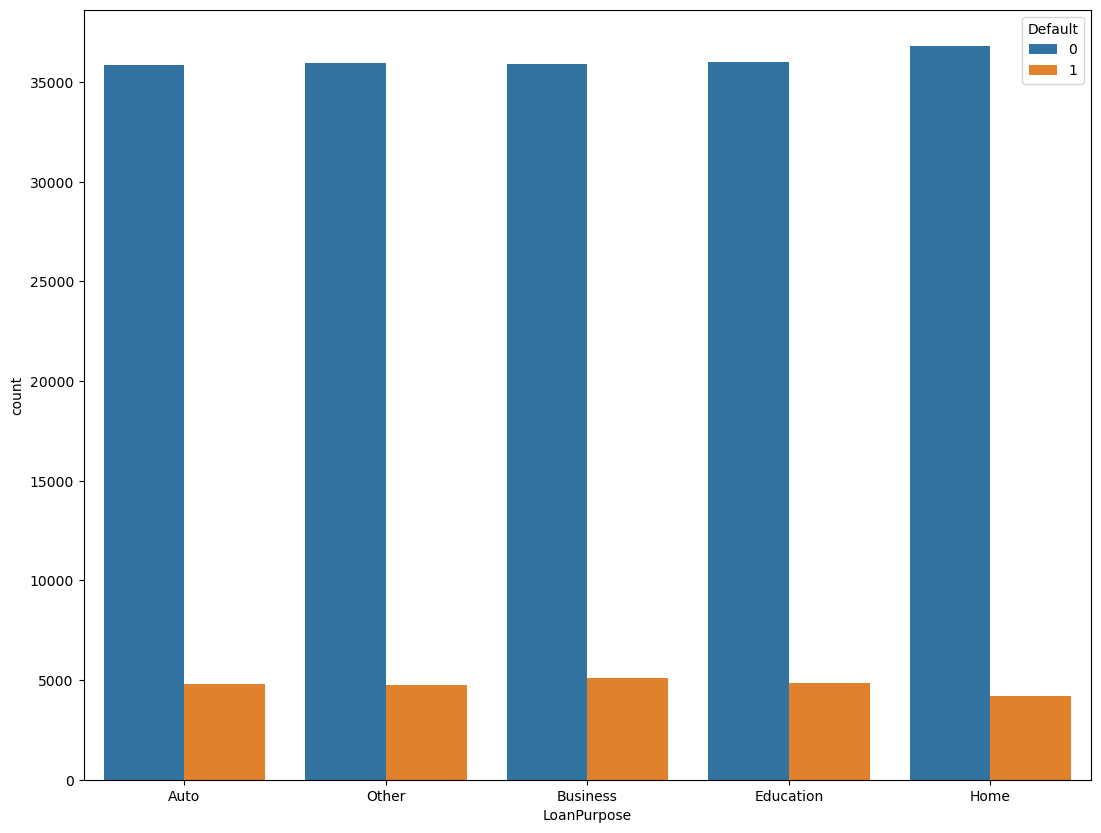

In [72]:
#create a countplot to visualize the distribution of Loan Purpose levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="LoanPurpose", hue="Default")

In [73]:
#calculate and display the odds of default by Loan Purpose level
odds_loanpurpose = calculate_odds(data = training_data, predictor_label = "LoanPurpose", response_variable="Default")
odds_loanpurpose

Default,0,1,Odds
LoanPurpose,,,
Business,35917,5091,0.14
Auto,35884,4818,0.13
Education,35990,4833,0.13
Other,35971,4777,0.13
Home,36793,4203,0.11


**Summary**

- "Business" purpose loans have a higher default rate than others.
- Loans with the purpose of "Auto," "Education," and "Other" have a default rate of around 13%, which is about the same.
- Loans with the purpose of "Home" have the lowest default rate, around 11%.

#### ***Predictor 15 : HasCoSigner***

In [74]:
#generate descriptive statistic for Has Co-Signer column
training_data['HasCoSigner'].value_counts(normalize = True)

Yes    0.50012
No     0.49988
Name: HasCoSigner, dtype: float64

<AxesSubplot:xlabel='HasCoSigner', ylabel='count'>

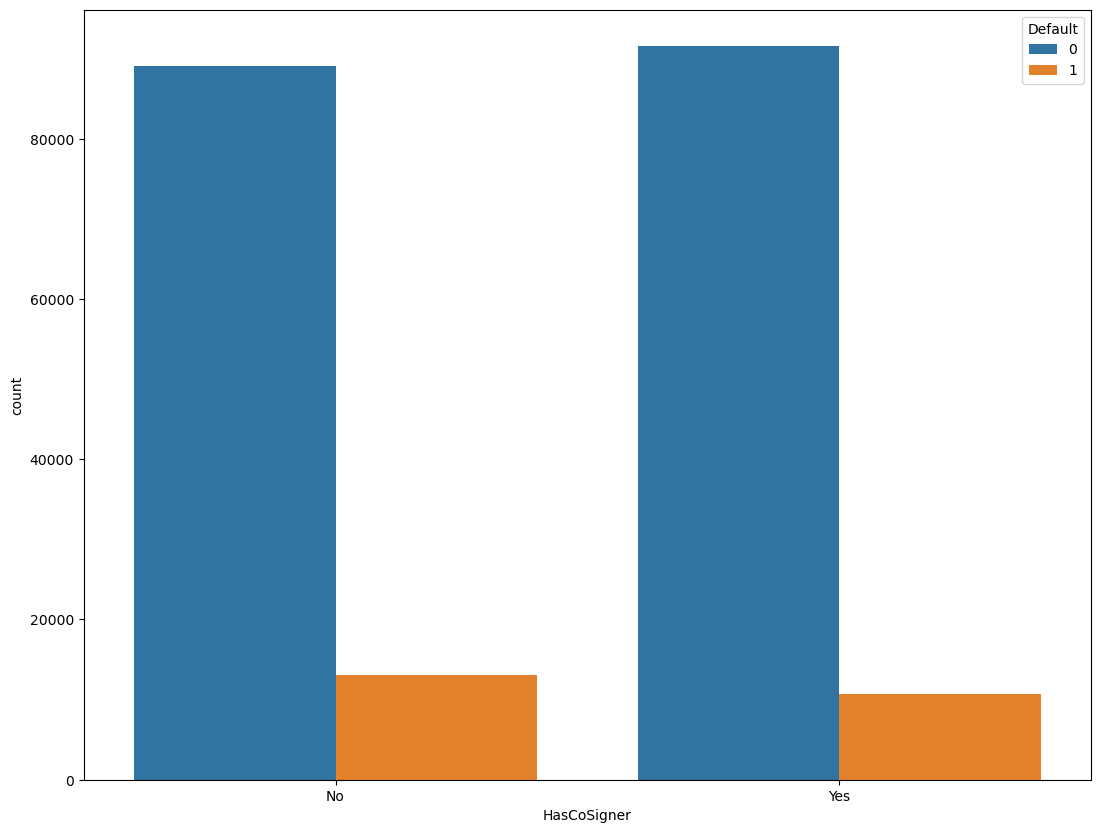

In [75]:
#create a countplot to visualize the distribution of Has Co-Signer levels and their relationship to default status
plt.figure(figsize=(13, 10))
sns.countplot(data=training_data, x="HasCoSigner", hue="Default")

In [76]:
#calculate and display the odds of default by Has Co-Signer level
odds_hascosigner = calculate_odds(data = training_data, predictor_label = "HasCoSigner", response_variable="Default")
odds_hascosigner

Default,0,1,Odds
HasCoSigner,,,
No,89030,13084,0.15
Yes,91525,10638,0.12


**Summary**

- Loans with co-signers have a lower default rate than loans without co-signers.

### **2.1 Check Correlation**

##### Define and describe numerical and categorical predictors

In [77]:
#display basic information about the training_data DataFrame
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204277 entries, 15826 to 7493
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             204277 non-null  int64  
 1   Income          204277 non-null  int64  
 2   LoanAmount      204277 non-null  int64  
 3   MonthsEmployed  204277 non-null  int64  
 4   NumCreditLines  204277 non-null  int64  
 5   InterestRate    204277 non-null  float64
 6   LoanTerm        204277 non-null  int64  
 7   DTIRatio        204277 non-null  float64
 8   Education       204277 non-null  object 
 9   EmploymentType  204277 non-null  object 
 10  MaritalStatus   204277 non-null  object 
 11  HasMortgage     204277 non-null  object 
 12  HasDependents   204277 non-null  object 
 13  LoanPurpose     204277 non-null  object 
 14  HasCoSigner     204277 non-null  object 
 15  Default         204277 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 34.6+

In [78]:
#display the column names of the training_data DataFrame
training_data.columns

Index(['Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'NumCreditLines',
       'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType',
       'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose',
       'HasCoSigner', 'Default'],
      dtype='object')

In [79]:
#display summary statistics for the numeric columns in the training_data DataFrame
training_data.describe()

,Age,Income,LoanAmount,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.508716,82530.595393,127523.946225,59.578420,2.501892,13.488165,35.991188,0.500504,0.116127
std,14.989978,38971.511128,70876.250817,34.664996,1.116968,6.638219,16.973883,0.231005,0.320377
min,18.000000,15000.000000,5000.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48842.000000,65983.000000,30.000000,2.000000,7.760000,24.000000,0.300000,0.000000
50%,44.000000,82519.000000,127400.000000,60.000000,3.000000,13.450000,36.000000,0.500000,0.000000
75%,56.000000,116223.000000,189046.000000,90.000000,4.000000,19.240000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [80]:
#display summary statistics for the non-numeric (object) columns in the training_data DataFrame
training_data.describe(include='O')

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,204277,204277,204277,204277,204277,204277,204277
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,51537,51324,68261,102183,102276,41008,102163


### **2.2 Check Multicollinearity**

In [81]:
config_data = utils.config_load()
config_data

{'raw_dataset_path': '../data/raw/Loan_default.csv',
 'dataset_path': '../data/output/data.pkl',
 'predictors_set_path': '../data/output/predictors.pkl',
 'response_set_path': '../data/output/response.pkl',
 'train_path': ['../data/output/X_train.pkl', '../data/output/y_train.pkl'],
 'test_path': ['../data/output/X_test.pkl', '../data/output/y_test.pkl'],
 'data_train_path': '../data/output/training_data.pkl',
 'data_train_binned_path': '../data/output/bin_training_data.pkl',
 'crosstab_list_path': '../data/output/list_crosstab.pkl',
 'WOE_table_path': '../data/output/WOE_table.pkl',
 'IV_table_path': '../data/output/IV_table.pkl',
 'WOE_map_dict_path': '../data/output/WOE_map_dict.pkl',
 'X_train_woe_path': '../data/output/X_train_woe.pkl',
 'response_variable': 'Default',
 'test_size': 0.2,
 'numeric_col': ['Age',
  'Income',
  'LoanAmount',
  'MonthsEmployed',
  'NumCreditLines',
  'InterestRate',
  'LoanTerm',
  'DTIRatio'],
 'categoric_col': ['Education',
  'EmploymentType',
  'Ma

In [82]:
#initialize numeric and categoric column
numeric_col = config_data['numeric_col']
categoric_col = config_data['categoric_col']

In [83]:
#compute and display the Pearson correlation matrix for numeric columns in training_data
trainingdata_corr = training_data[numeric_col].corr(method = 'pearson')
trainingdata_corr

,Age,Income,LoanAmount,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
Age,1.000000,-0.001023,-0.002981,-0.001215,-0.000535,-0.000491,0.000937,-0.004387
Income,-0.001023,1.000000,-0.001912,0.002763,-0.000985,-0.002954,-0.002404,0.001064
LoanAmount,-0.002981,-0.001912,1.000000,0.003461,0.000014,-0.000518,0.002282,0.001361
MonthsEmployed,-0.001215,0.002763,0.003461,1.000000,0.002522,0.000720,-0.001745,-0.000916
NumCreditLines,-0.000535,-0.000985,0.000014,0.002522,1.000000,-0.000363,-0.000681,-0.000348
InterestRate,-0.000491,-0.002954,-0.000518,0.000720,-0.000363,1.000000,0.000355,0.001175
LoanTerm,0.000937,-0.002404,0.002282,-0.001745,-0.000681,0.000355,1.000000,0.003654
DTIRatio,-0.004387,0.001064,0.001361,-0.000916,-0.000348,0.001175,0.003654,1.000000


In [84]:
#compute the Pearson correlation matrix for numeric columns in training_data
corr = training_data[numeric_col].corr()

#define a color palette for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_11288\2157743775.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap=cmap, mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


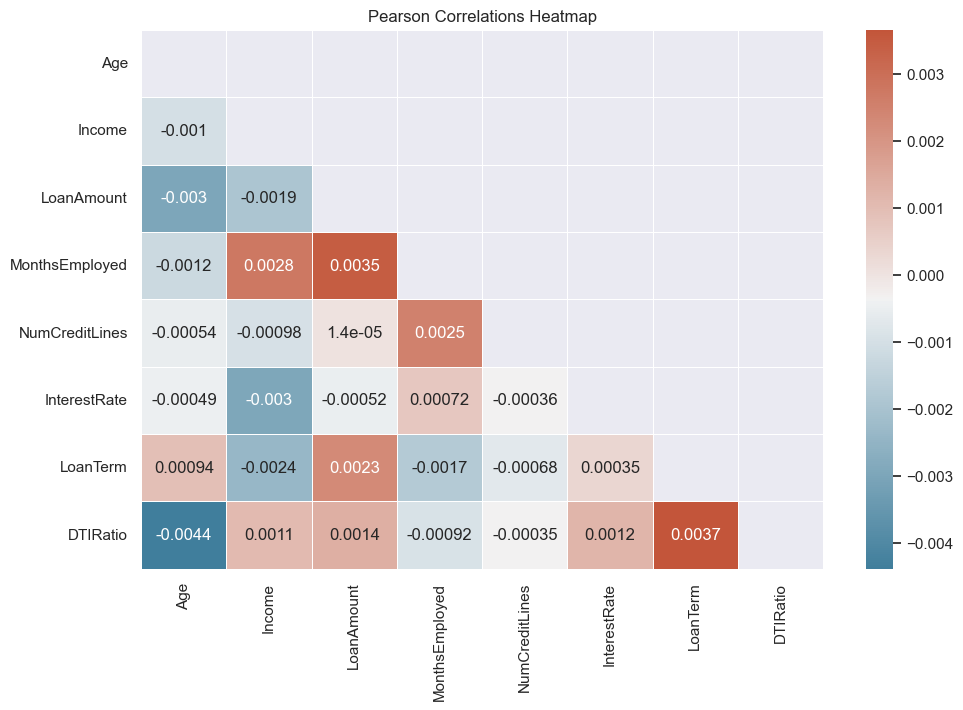

In [85]:
#set the figure size for the heatmap
sns.set(rc={'figure.figsize':(11,7)})

#create a heatmap with annotations, using the defined colormap and masking the upper triangle
sns.heatmap(corr,linewidths=.5, annot=True, cmap=cmap, mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [86]:
#identify categorical columns (object-type) in the training_data DataFrame
cat_cols = [col for col in training_data.columns if training_data[col].dtypes == 'O']

#loop through each categorical column and print its value counts
for col in cat_cols:
    print(training_data[col].value_counts(), "\n")

Bachelor's     51537
High School    51122
PhD            50923
Master's       50695
Name: Education, dtype: int64 

Part-time        51324
Self-employed    51024
Unemployed       50997
Full-time        50932
Name: EmploymentType, dtype: int64 

Married     68261
Divorced    68032
Single      67984
Name: MaritalStatus, dtype: int64 

Yes    102183
No     102094
Name: HasMortgage, dtype: int64 

Yes    102276
No     102001
Name: HasDependents, dtype: int64 

Business     41008
Home         40996
Education    40823
Other        40748
Auto         40702
Name: LoanPurpose, dtype: int64 

Yes    102163
No     102114
Name: HasCoSigner, dtype: int64 



There is no multicollinearity in numerical predictors.